In [59]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Persona

In [60]:
file = "../../data/eic2015_09_csv/TR_PERSONA09.CSV"

In [61]:
df = pd.read_csv(file, encoding='latin')

In [62]:
df.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,90020000001,9002000000101,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,90020000001,9002000000102,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,90020000002,9002000000201,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-03,...,5.0,0.0,5.0,2.0,1985.0,1.0,NaN,NaN,NaN,5
3,90020000003,9002000000306,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,90020000003,9002000000305,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [63]:
df.shape

(553032, 86)

In [64]:
df_copy = df.copy()

In [65]:
df_copy.columns

Index(['ID_VIV', 'ID_PERSONA', 'ENT', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC50K',
       'NOM_LOC', 'COBERTURA', 'ESTRATO', 'UPM', 'FACTOR', 'NUMPER', 'SEXO',
       'EDAD', 'PARENT', 'PARENT_OTRO_C', 'IDENT_MADRE', 'IDENT_PADRE',
       'SERSALUD', 'AFRODES', 'ACTA_NAC', 'DHSERSAL1', 'DHSERSAL2',
       'PERTE_INDIGENA', 'ENT_PAIS_NAC', 'NACIONALIDAD', 'HLENGUA',
       'QDIALECT_C', 'QDIALECT_INALI', 'HESPANOL', 'ELENGUA', 'ASISTEN',
       'MUN_ASI', 'NOM_MUN_ASI', 'ENT_PAIS_ASI', 'TIE_TRASLADO_ESCU',
       'MED_TRASLADO_ESC1', 'MED_TRASLADO_ESC2', 'MED_TRASLADO_ESC3',
       'ESCOLARI', 'NIVACAD', 'ALFABET', 'ESCOACUM', 'MUN_RES10',
       'NOM_MUN_RES10', 'ENT_PAIS_RES10', 'SITUA_CONYUGAL', 'IDENT_PAREJA',
       'CONACT', 'OCUPACION_C', 'SITUACION_TRAB', 'AGUINALDO', 'VACACIONES',
       'SERVICIO_MEDICO', 'UTILIDADES', 'INCAP_SUELDO', 'SAR_AFORE',
       'CREDITO_VIVIENDA', 'INGTRMEN', 'ACTIVIDADES_C', 'MUN_TRAB',
       'NOM_MUN_TRAB', 'ENT_PAIS_TRAB', 'TIE_TRASLADO_TRAB',
       '

## Check NA

In [66]:
df_copy.isnull().any().any()

True

In [67]:
df_copy.columns[df_copy.isnull().any()]

Index(['DHSERSAL2', 'HLENGUA', 'QDIALECT_C', 'QDIALECT_INALI', 'HESPANOL',
       'ELENGUA', 'ASISTEN', 'MUN_ASI', 'NOM_MUN_ASI', 'ENT_PAIS_ASI',
       'TIE_TRASLADO_ESCU', 'MED_TRASLADO_ESC1', 'MED_TRASLADO_ESC2',
       'MED_TRASLADO_ESC3', 'ESCOLARI', 'NIVACAD', 'ALFABET', 'ESCOACUM',
       'MUN_RES10', 'NOM_MUN_RES10', 'ENT_PAIS_RES10', 'SITUA_CONYUGAL',
       'IDENT_PAREJA', 'CONACT', 'OCUPACION_C', 'SITUACION_TRAB', 'AGUINALDO',
       'VACACIONES', 'SERVICIO_MEDICO', 'UTILIDADES', 'INCAP_SUELDO',
       'SAR_AFORE', 'CREDITO_VIVIENDA', 'INGTRMEN', 'ACTIVIDADES_C',
       'MUN_TRAB', 'NOM_MUN_TRAB', 'ENT_PAIS_TRAB', 'TIE_TRASLADO_TRAB',
       'MED_TRASLADO_TRAB1', 'MED_TRASLADO_TRAB2', 'MED_TRASLADO_TRAB3',
       'ACTI_SIN_PAGO1', 'ACTI_SIN_PAGO2', 'ACTI_SIN_PAGO3', 'ACTI_SIN_PAGO4',
       'ACTI_SIN_PAGO5', 'ACTI_SIN_PAGO6', 'ACTI_SIN_PAGO7', 'ACTI_SIN_PAGO8',
       'HIJOS_NAC_VIVOS', 'HIJOS_FALLECIDOS', 'HIJOS_SOBREVIV', 'FECHA_NAC_M',
       'FECHA_NAC_A', 'SOBREVIVENCIA

In [68]:
len(pd.isnull(df_copy).any(1).nonzero()[0].tolist())

553032

In [69]:
df_copy.replace(to_replace=' ', value=np.NaN, inplace=True)

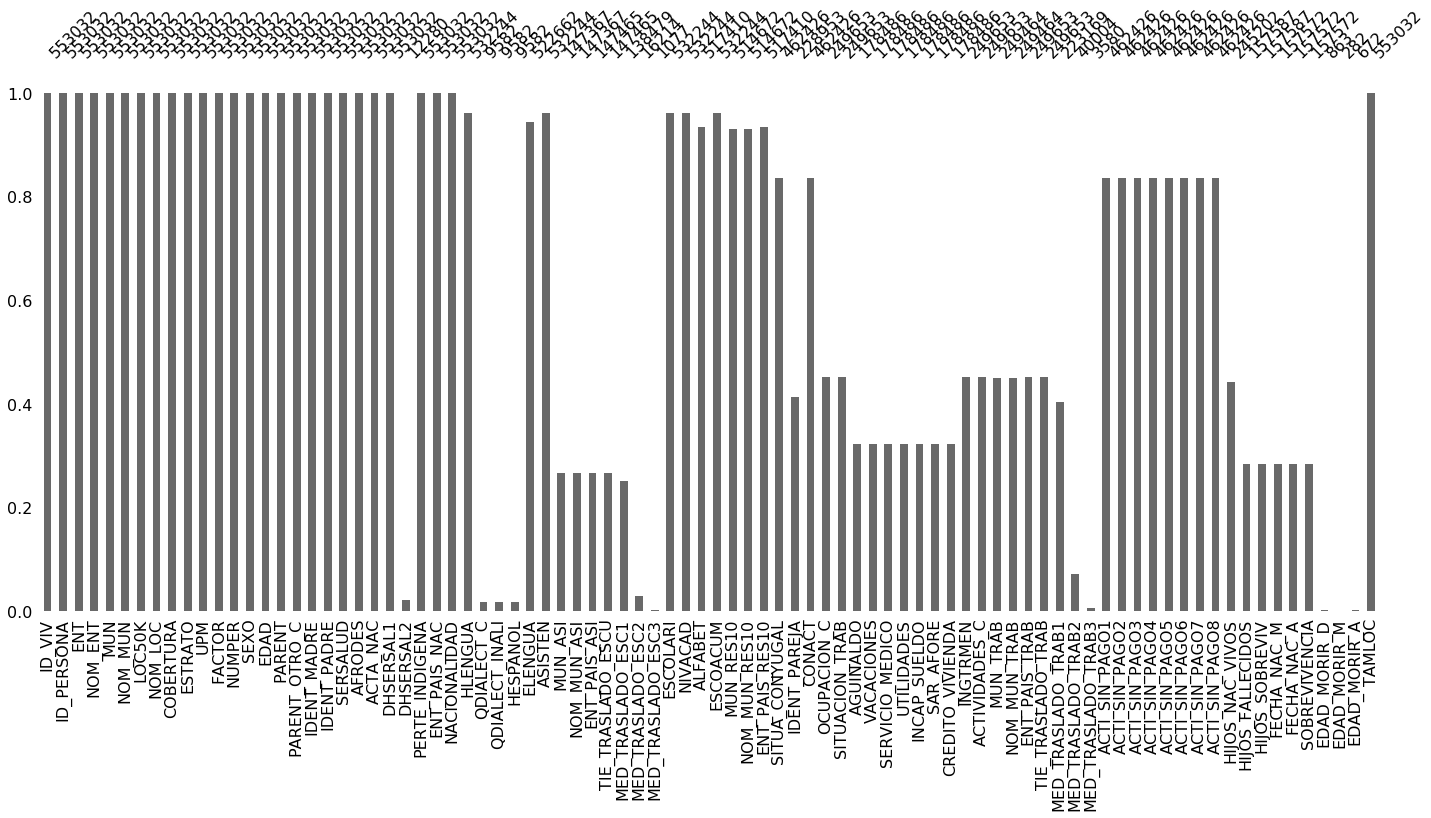

In [70]:
msno.bar(df_copy)
plt.savefig('../../images/pre_load_bar_persona.png')

In [71]:
df_copy.fillna(value=-1, inplace=True)

In [72]:
threshold = round(df_copy.shape[0]*.8)
threshold

442426

In [73]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        #print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            #print(column, ': ', 'd e l e t e d')
            l.append(column)

In [74]:
df_copy.shape

(553032, 86)

In [75]:
len(l)

40

In [76]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [77]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

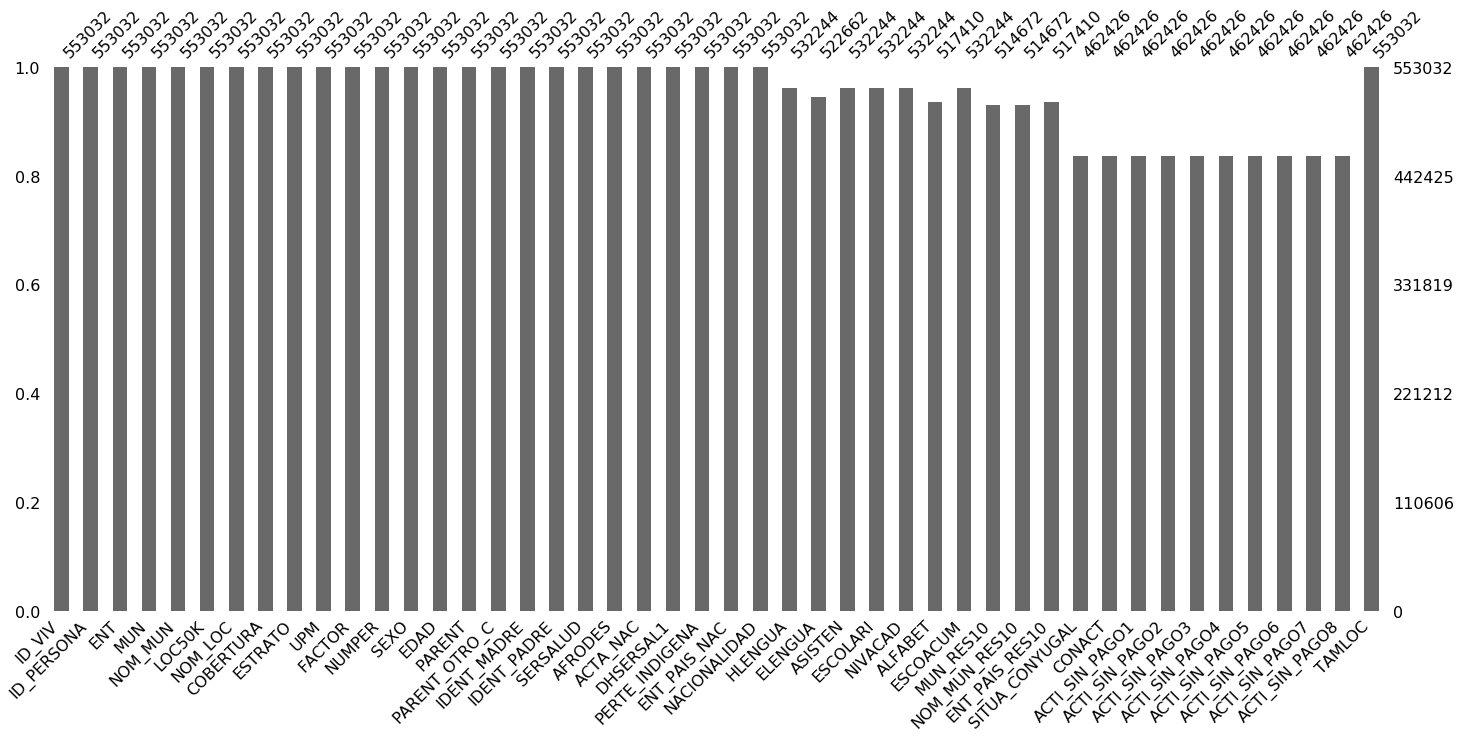

In [78]:
msno.bar(df_copy)
plt.savefig('../../images/post_load_bar_persona.png')

In [79]:
df_copy.isnull().any().any()

True

In [80]:
df_copy.shape

(553032, 46)

In [44]:
file = "../../dataframes/intercensal_persona.csv"

In [45]:
df_copy.to_csv(file)